# GAN - BREATHING WAVE
## Generative Adversarial Networks
### 05 May 2023
***

## PART 1 : Data Preprocessing

### Importing Library

In [1]:
import pandas as pd
import numpy as np

### Import Dataset

In [2]:
df = pd.read_csv("dataset/breathing_waveform_data.csv").iloc[:, :-1] # get rid of last column ("notes")

### Filter the zeros values
> This will filtered the zeros value from all column (except first column)
>
> CAUSE : I think is natural for the first column to be 0.0 (because the time(X) still on 0 second)

In [3]:
zeros_val = df[df.iloc[:, 1:].eq(0).any(axis=1)]

In [4]:
zeros_val

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
5473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
5477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


### Drop the table that has value zeros on it

In [5]:
df = df[~df.isin(zeros_val)].dropna()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,labels
0,0.483309,0.459790,0.431024,0.376565,0.295734,0.193290,0.066060,-0.083445,-0.247221,-0.409374,...,0.391514,0.452677,0.521407,0.595845,0.661691,0.702932,0.708613,0.682564,0.637765,deep
1,-2.044518,-1.935588,-1.808629,-1.667919,-1.513497,-1.348760,-1.171044,-0.972509,-0.759554,-0.547793,...,0.138731,-0.053860,-0.241691,-0.417603,-0.582320,-0.738485,-0.889731,-1.037066,-1.174654,deep
2,-1.213535,-1.269056,-1.323306,-1.375251,-1.430062,-1.485479,-1.529200,-1.557172,-1.574662,-1.575457,...,0.947940,0.996154,1.035743,1.049543,1.024204,0.954716,0.844505,0.702445,0.541555,deep
3,-0.914806,-0.887726,-0.856065,-0.823527,-0.794551,-0.768074,-0.740895,-0.713364,-0.685445,-0.652020,...,-0.478218,-0.571465,-0.684115,-0.817078,-0.966231,-1.122537,-1.264759,-1.376908,-1.461059,deep
4,-1.547469,-1.458818,-1.362120,-1.264829,-1.164948,-1.060064,-0.954496,-0.849448,-0.742812,-0.636614,...,0.227050,0.130983,0.041438,-0.038034,-0.106152,-0.163048,-0.210926,-0.253102,-0.290270,deep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,-0.152463,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,...,-0.336787,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,quick
26396,-0.164723,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,...,-0.306774,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,quick
26397,-0.165409,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,...,-0.280607,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,quick
26398,-0.152623,-0.118115,-0.066218,-0.010253,0.041637,0.092217,0.140510,0.188025,0.240939,0.294399,...,-0.269843,-0.260062,-0.229981,-0.167654,-0.082300,0.004372,0.089958,0.179209,0.264014,quick


## PART 2 : Generating Synthetic Data

### Importing CTGAN Library

In [7]:
from ctgan import CTGAN

### Define the discrete values inside the dataset

In [8]:
discrete_columns = [
    'labels'
]

### Setting the CTGAN and fit the GAN

In [9]:
ctgan = CTGAN(epochs=100, verbose=True)
ctgan.fit(df, discrete_columns)

Epoch 1, Loss G:  2.9874,Loss D: -0.0001
Epoch 2, Loss G:  2.4310,Loss D:  0.2817
Epoch 3, Loss G:  1.5366,Loss D:  0.0047
Epoch 4, Loss G:  0.9525,Loss D: -0.3281
Epoch 5, Loss G:  0.9384,Loss D: -0.9651
Epoch 6, Loss G:  0.9434,Loss D: -2.1186
Epoch 7, Loss G:  0.9425,Loss D: -2.7077
Epoch 8, Loss G:  1.5338,Loss D: -4.9681
Epoch 9, Loss G:  0.5154,Loss D: -3.6435
Epoch 10, Loss G: -1.6813,Loss D: -1.0224
Epoch 11, Loss G: -1.4975,Loss D: -1.4258
Epoch 12, Loss G: -1.8243,Loss D: -1.4927
Epoch 13, Loss G: -1.7187,Loss D: -0.6971
Epoch 14, Loss G: -2.2995,Loss D: -0.8184
Epoch 15, Loss G: -1.7284,Loss D: -1.7724
Epoch 16, Loss G: -0.7948,Loss D: -3.0456
Epoch 17, Loss G: -0.9548,Loss D: -1.5755
Epoch 18, Loss G: -1.3559,Loss D: -1.6156
Epoch 19, Loss G: -1.5101,Loss D: -0.7001
Epoch 20, Loss G: -3.4533,Loss D: -0.6539
Epoch 21, Loss G: -2.2394,Loss D: -0.6741
Epoch 22, Loss G: -2.0253,Loss D: -0.3798
Epoch 23, Loss G: -1.8526,Loss D: -0.4225
Epoch 24, Loss G: -2.0261,Loss D: -1.3099
E

### Generate synthetic data

In [10]:
samples = ctgan.sample(1000)

### Evaluate Data

(25726, 86) (1000, 86)


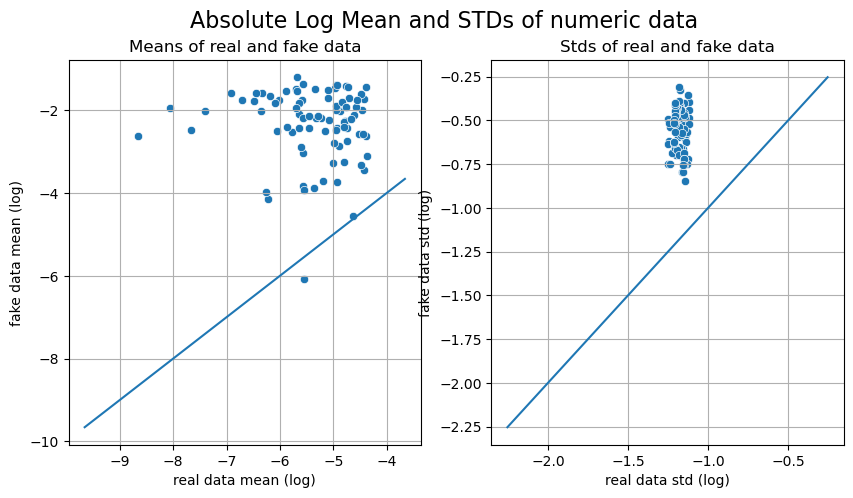

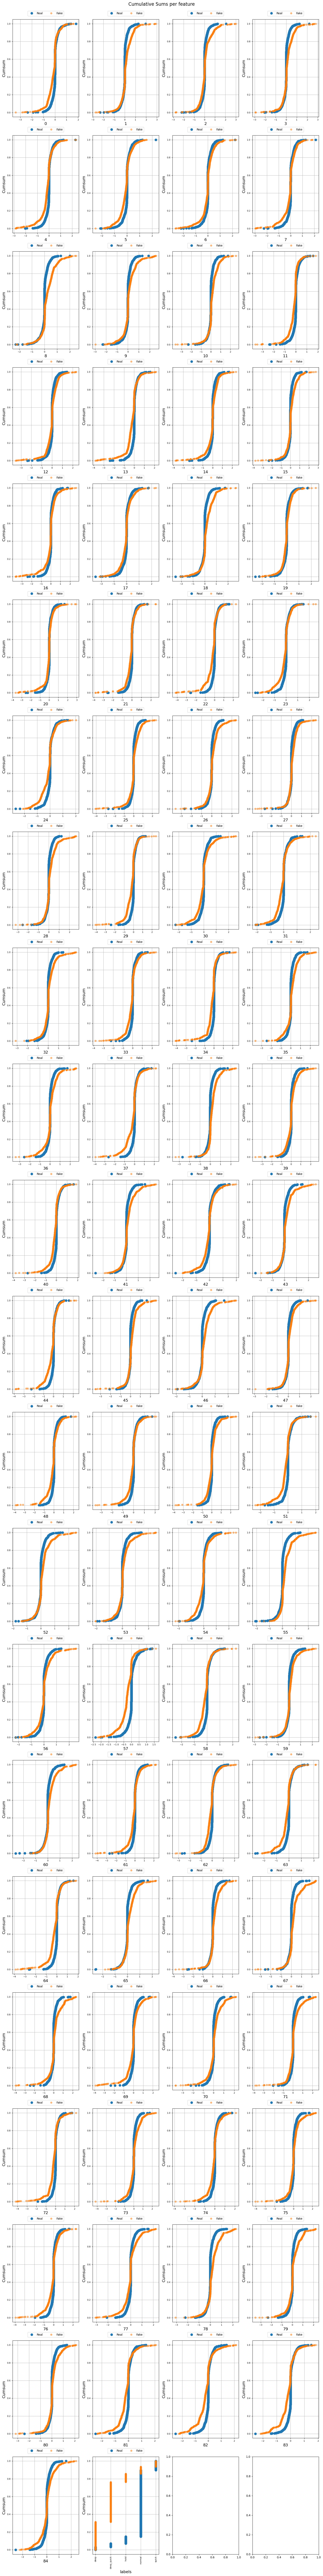

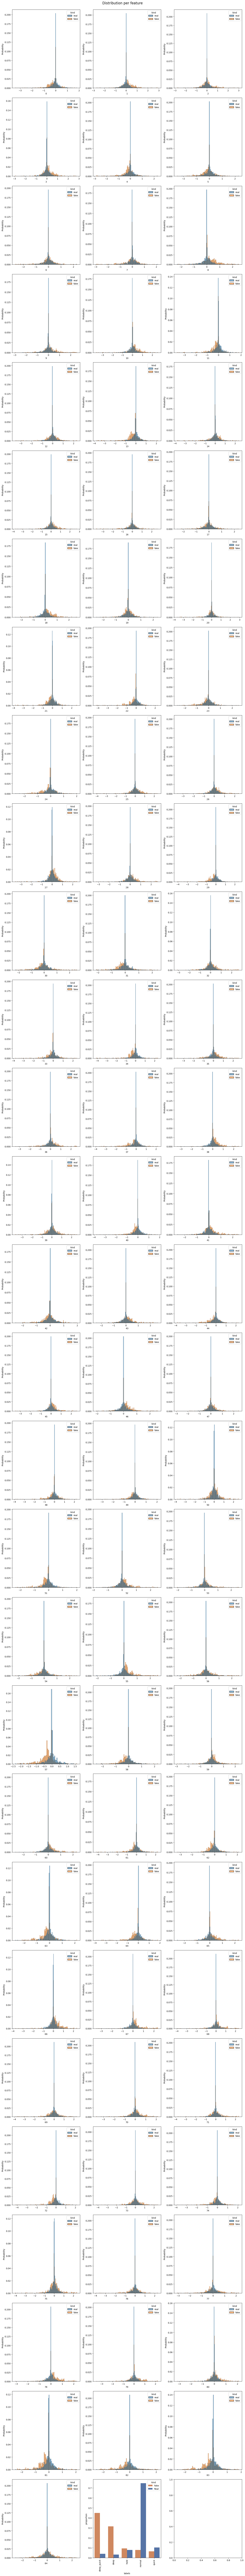

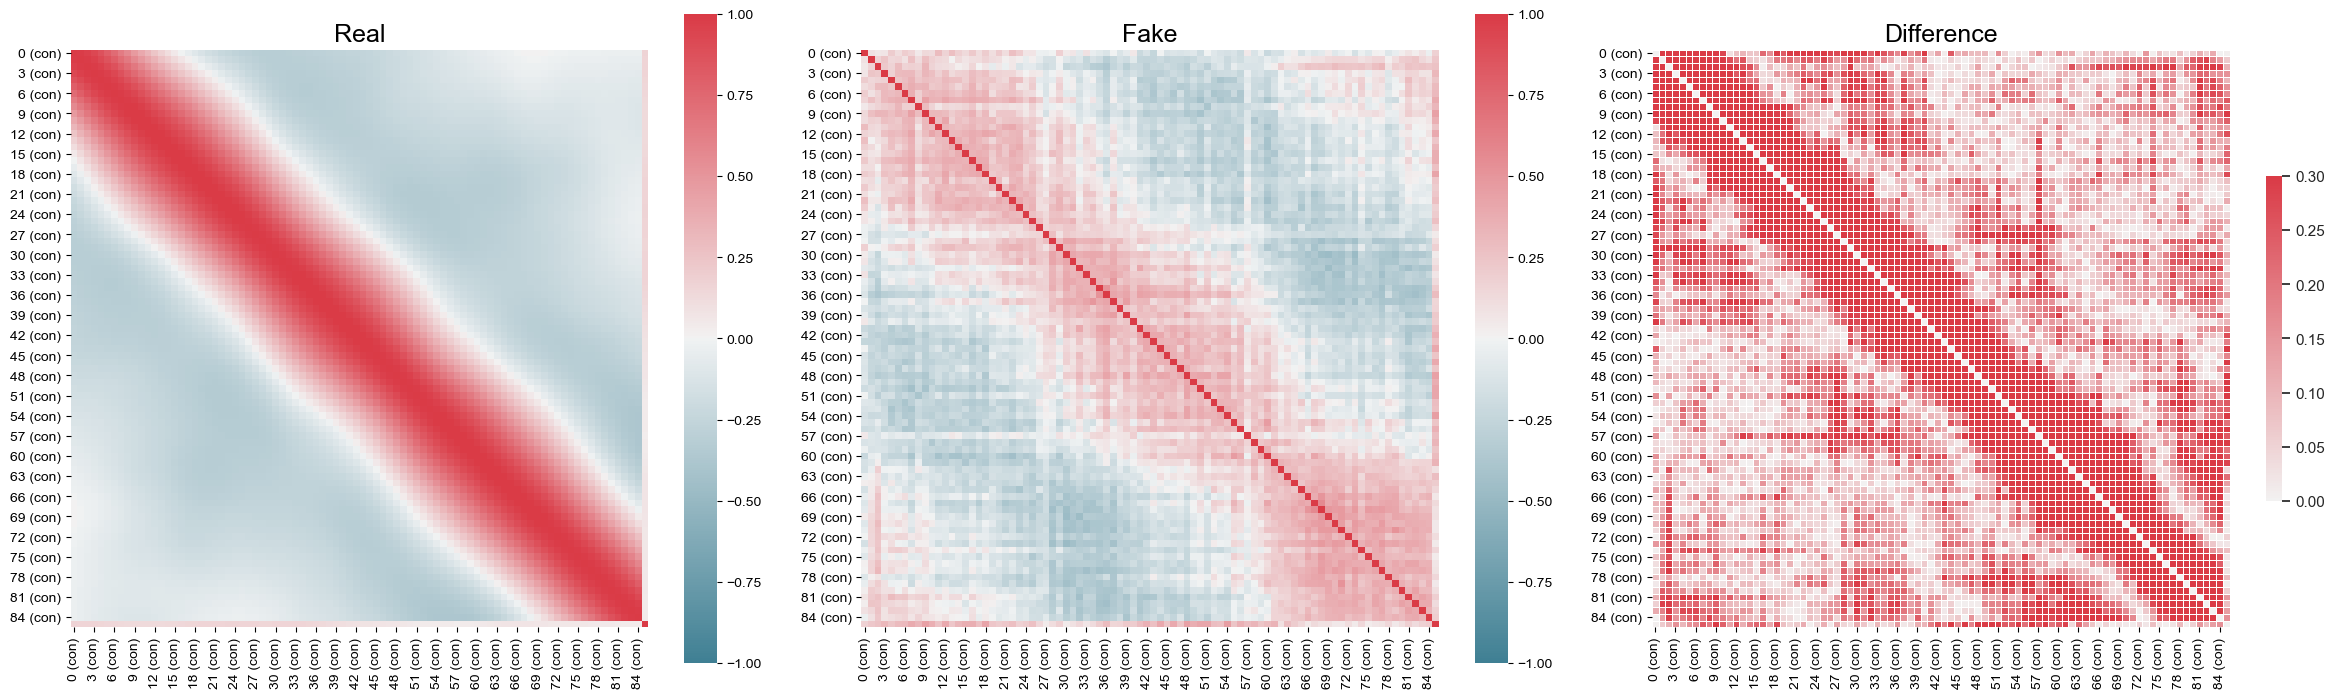

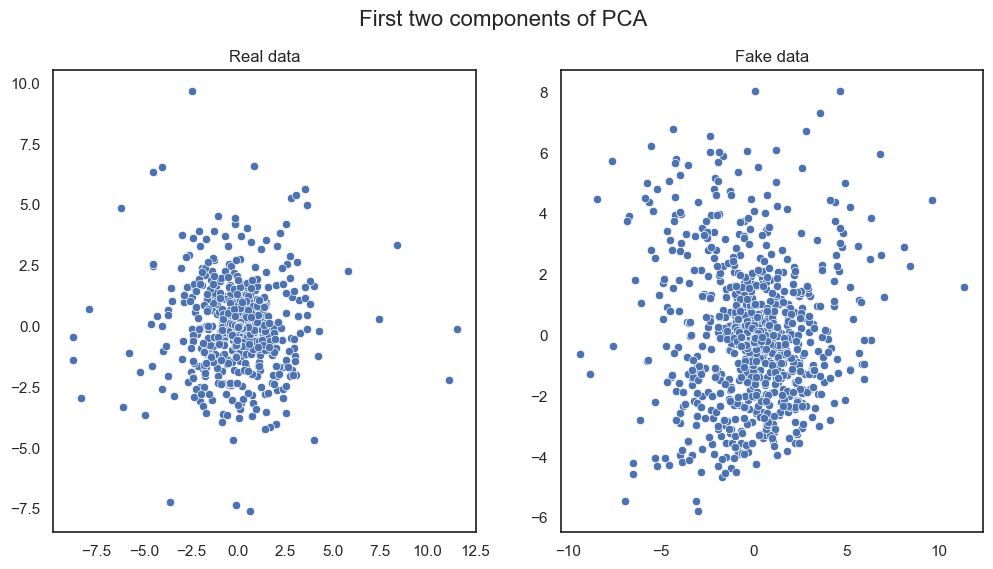

In [11]:
from table_evaluator import TableEvaluator

print(df.shape, samples.shape)
table_evaluator = TableEvaluator(df, samples, cat_cols=discrete_columns)

table_evaluator.visual_evaluation()